In [1]:
import tensorflow as tf
import utils as ut
import math
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

2024-01-09 23:03:01.685698: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-09 23:03:01.745922: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-09 23:03:01.745957: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-09 23:03:01.747727: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-09 23:03:01.757280: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-09 23:03:01.757795: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
def show(mat):
    plt.figure(figsize = (3,3))
    plt.axis("off")
    plt.imshow(mat, cmap = "gray")
    plt.show()

In [7]:
data = ut.loadData("./models/data_binary")
labels = ut.loadData("./models/labels")
classes = ut.loadData("./models/classes")

In [8]:
for i in range(len(labels)):
    id = classes[labels[i]]
    labels[i] = id

In [9]:
data = [data[i]/255 for i in range(len(data))]

In [10]:
labels = np.array(labels, dtype=np.uint8)
data = np.array(data, dtype=np.uint8)
print(type(data))
print(type(labels))
assert data.shape[0] == labels.shape[0]

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [11]:
print(len(data))
print(len(labels))

36576
36576


In [12]:
data_train, data_test, labels_train, labels_test = train_test_split(data, labels, test_size=0.1)
print(len(data_train))
print(len(data_test))
print(len(labels_train))
print(len(labels_test))

32918
3658
32918
3658


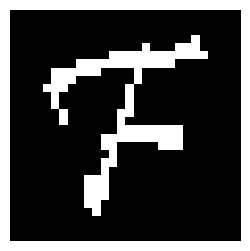

In [13]:
show(data_train[0])

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(
        input_shape = (28,28,1)
    )
    ,tf.keras.layers.Dense(
        units = 50
        ,activation="relu"
    )
    ,tf.keras.layers.Dense(
        units = 36
        ,activation = "softmax"
    )
])

2024-01-09 23:04:24.209980: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 50)                39250     
                                                                 
 dense_1 (Dense)             (None, 36)                1836      
                                                                 
Total params: 41086 (160.49 KB)
Trainable params: 41086 (160.49 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history =  model.fit(
    data_train
    ,labels_train
    ,epochs = 60
)

Epoch 1/60
1029/1029 [==============================] - 3s 2ms/step - loss: 0.9453 - accuracy: 0.7841
Epoch 2/60
1029/1029 [==============================] - 2s 2ms/step - loss: 0.4553 - accuracy: 0.8870
Epoch 3/60
1029/1029 [==============================] - 2s 2ms/step - loss: 0.3727 - accuracy: 0.9037
Epoch 4/60
1029/1029 [==============================] - 2s 2ms/step - loss: 0.3187 - accuracy: 0.9164
Epoch 5/60
1029/1029 [==============================] - 2s 2ms/step - loss: 0.2803 - accuracy: 0.9254
Epoch 6/60
1029/1029 [==============================] - 2s 2ms/step - loss: 0.2475 - accuracy: 0.9336
Epoch 7/60
1029/1029 [==============================] - 2s 2ms/step - loss: 0.2203 - accuracy: 0.9399
Epoch 8/60
1029/1029 [==============================] - 3s 2ms/step - loss: 0.1963 - accuracy: 0.9465
Epoch 9/60
1029/1029 [==============================] - 2s 2ms/step - loss: 0.1768 - accuracy: 0.9514
Epoch 10/60
1029/1029 [==============================] - 2s 2ms/step - loss: 0.159

In [16]:
model.evaluate(data_test, labels_test)

115/115 [==============================] - 0s 2ms/step - loss: 0.4103 - accuracy: 0.9347


[0.41026267409324646, 0.9346637725830078]

In [19]:
model.save("./models/ann")

INFO:tensorflow:Assets written to: ./models/ann/assets


INFO:tensorflow:Assets written to: ./models/ann/assets
